## 1.Preprocessing the Dataset

In [37]:
#1.Importing required libraries
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
#2.Loading the dataset
data = pd.read_csv('/content/House Price India.csv')
print(data)

               id   Date  number of bedrooms  number of bathrooms  \
0      6762810145  42491                   5                 2.50   
1      6762810635  42491                   4                 2.50   
2      6762810998  42491                   5                 2.75   
3      6762812605  42491                   4                 2.50   
4      6762812919  42491                   3                 2.00   
...           ...    ...                 ...                  ...   
14615  6762830250  42734                   2                 1.50   
14616  6762830339  42734                   3                 2.00   
14617  6762830618  42734                   2                 1.00   
14618  6762830709  42734                   4                 1.00   
14619  6762831463  42734                   3                 1.00   

       living area  lot area  number of floors  waterfront present  \
0             3650      9050               2.0                   0   
1             2920      4000   

In [39]:
#3.task assigned in dataset
data['number of bathrooms'] = data['number of bathrooms'].astype(int)
data['number of bedrooms'] = data['number of bedrooms'].astype(int)
data['waterfront present'] = data['waterfront present'].astype(int)
data = data.drop("Date" , axis=1)
data.head()

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,5,2,3650,9050,2.0,0,4,5,10,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,4,2,2920,4000,1.5,0,0,5,8,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,5,2,2910,9480,1.5,0,0,3,8,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,4,2,3310,42998,2.0,0,0,3,9,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,3,2,2710,4500,1.5,0,0,4,8,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [40]:
#4.Checking missing values
print(data.isnull().any())#there is no missing  values

id                                       False
number of bedrooms                       False
number of bathrooms                      False
living area                              False
lot area                                 False
number of floors                         False
waterfront present                       False
number of views                          False
condition of the house                   False
grade of the house                       False
Area of the house(excluding basement)    False
Area of the basement                     False
Built Year                               False
Renovation Year                          False
Postal Code                              False
Lattitude                                False
Longitude                                False
living_area_renov                        False
lot_area_renov                           False
Number of schools nearby                 False
Distance from the airport                False
Price        

In [41]:
#5.Encoding the categorical variables using one-hot encoding
categorical_cols = data.select_dtypes(include=['object']).columns
print(categorical_cols)#there is no categorical variables

Index([], dtype='object')


In [42]:
#6.Spliting the dataset into training and testing sets
X = data.iloc[:, :-1].values # Features
y = data.iloc[:, -1].values # Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2.Building the ANN Model

In [43]:
model = Sequential()
#a.Input Layer
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
#b.Min of 2 hidden layers
model.add(Dense(64, activation='relu')) # Hidden Layer 1
model.add(Dense(32, activation='relu')) # Hidden Layer 2
#c.Output Layer
model.add(Dense(1))
#Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
#Training the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
366/366 [==============================] - 2s 2ms/step - loss: 260774861733888.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 200320696320.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 284910583808.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 556119425024.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 18878560206848.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 9042706563072.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 216702423924736.0000
Epoch 8/100
366/366 [==============================] - 1s 3ms/step - loss: 195402973184.0000
Epoch 9/100
366/366 [==============================] - 1s 3ms/step - loss: 205263044608.0000
Epoch 10/100
366/366 [==============================] - 1s 3ms/step - loss: 218544439296.0000
Epoch 11/100
366/366 [==============================] - 1s 2

## 3.Testing the Model

In [44]:
#Using MSE
y_pred = model.predict(X_test)
mse = np.mean((y_pred-y_test)**2)
print("Mean Squared Error:", mse)

92/92 [==============================] - 0s 1ms/step
Mean Squared Error: 125172501348.40625


In [45]:
# Making predictions on test data
test_data = X[:10]
predictions = model.predict(test_data)

1/1 [==============================] - 0s 22ms/step


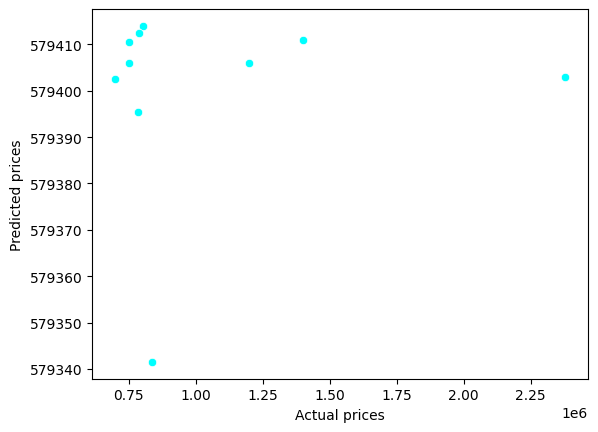

In [48]:
# Visualizing predicted values against actual values
sns.scatterplot(x=y[:10], y=predictions.flatten(),color='cyan')
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.show()